<a href="https://colab.research.google.com/github/ralsouza/predict_the_onset_diabetes/blob/master/src/01_predicting_diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## About this dataset
The datasets consist of several medical predictor (independent) variables and one target (dependent) variable, Outcome. Independent variables include the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

Source: https://www.kaggle.com/uciml/pima-indians-diabetes-database

## Columns
* **PregnanciesNumber** of times pregnant
* **Glucose** Plasma glucose concentration a 2 hours in an oral glucose tolerance test
* **BloodPressure** Diastolic blood pressure (mm Hg)
* **SkinThickness** Triceps skin fold thickness (mm)
* **Insulin** 2-Hour serum insulin (mu U/ml)
* **BMI** Body mass index (weight in kg/(height in m)^2)
* **DiabetesPedigreeFunction** Diabetes pedigree function
* **Age** Age (years)
* **Outcome** Class variable (0 or 1) 268 of 768 are 1, the others are 0

In [0]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

#1. Collecting and Exploring Data

In [0]:
# Dataset
path = 'drive/My Drive/datasets/pima-data.csv'
df = pd.read_csv(path)

In [0]:
# Check shape
df.shape

(768, 10)

In [0]:
# Check the first rows
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [0]:
# Check the last rows
df.tail()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
763,10,101,76,48,180,32.9,0.171,63,1.8912,False
764,2,122,70,27,0,36.8,0.340,27,1.0638,False
765,5,121,72,23,112,26.2,0.245,30,0.9062,False
766,1,126,60,0,0,30.1,0.349,47,0.0000,True
767,1,93,70,31,0,30.4,0.315,23,1.2214,False


In [0]:
# Check null values
df.isnull().values.any()

False

# 2. Data Preparation

In [0]:
# Identify the correlation between variables
def plot_corr(df,size=10):
  corr = df.corr()
  fig,ax = plt.subplots(figsize=(size,size))
  cax = ax.matshow(corr,vmin=-1,vmax=1)
  fig.colorbar(cax)
  plt.xticks(range(len(corr.columns)),corr.columns)
  plt.yticks(range(len(corr.columns)),corr.columns)

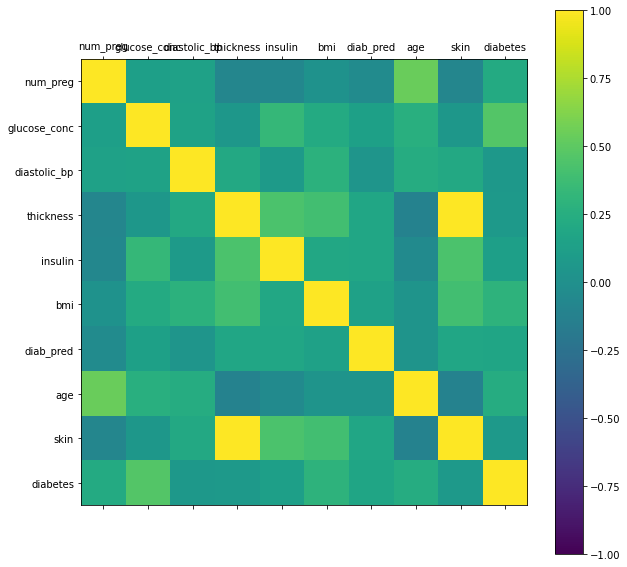

In [0]:
# Make the plot
plot_corr(df)

### Correlation Coefficient
* +1 Strong positive correlation
* 0 There is no correlation 
* -1 Strong negative correlation

In [0]:
# Correlation Matrix
df.corr()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
num_preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,-0.081672,0.221898
glucose_conc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.057328,0.466581
diastolic_bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.207371,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.436783,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.392573,0.292695
diab_pred,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.183928,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,-0.113970,0.238356
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,0.074752,1.000000


In [0]:
# Define the classes
diabetes_map = {True:1,False:0}

In [0]:
# Apply the classes in diabetes column
df['diabetes'] = df['diabetes'].map(diabetes_map)

In [0]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,1
1,1,85,66,29,0,26.6,0.351,31,1.1426,0
2,8,183,64,0,0,23.3,0.672,32,0.0000,1
3,1,89,66,23,94,28.1,0.167,21,0.9062,0
4,0,137,40,35,168,43.1,2.288,33,1.3790,1


In [0]:
# Check data distribuition
num_true = len(df.loc[df['diabetes'] == True])
num_false = len(df.loc[df['diabetes'] == False])

print('True  cases: {0} ({1:2.2f}%)'.format(num_true,(num_true/ (num_true + num_false)) * 100))
print('False cases: {0} ({1:2.2f}%)'.format(num_false,(num_false/ (num_true + num_false)) * 100))

# Important: The best practice is to balance the quantity of the two cases

True  cases: 268 (34.90%)
False cases: 500 (65.10%)


# 3. Training and Test Data
* 70% to training
* 30% to teste

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
df.columns.values

array(['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin',
       'bmi', 'diab_pred', 'age', 'skin', 'diabetes'], dtype=object)

In [0]:
# Feature Selection - Predict Variables
attr = ['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin', 'bmi', 'diab_pred', 'age']

In [0]:
# Value to be predicted
target = ['diabetes']

In [0]:
# Make the objects
x = df[attr].values
y = df[target].values

In [0]:
x

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [0]:
y

array([[1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
    

In [0]:
# Define split rate
split_test_rate = 0.30

In [0]:
# Make the train and test data
# This function will return four values
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=split_test_rate,random_state=42)

In [0]:
# Print result of split function
print("{0:0.2f}% in the train data".format((len(x_train)/len(df.index)) * 100))
print("{0:0.2f}% in the test data".format((len(x_test)/len(df.index)) * 100))

69.92% in the train data
30.08% in the test data


## 4. Check the proportion between datasets 
In addition, it is good practice to balance the quantity of the two cases in the original data set. This proportion also needs to be followed in the split data.

In our experiment, the proportion of split is followed in all datasets.

In [0]:

print("Original True : {0} ({1:0.2f}%)".format(len(df.loc[df['diabetes'] == 1]), 
                                               (len(df.loc[df['diabetes'] ==1])/len(df.index) * 100)))

print("Original False : {0} ({1:0.2f}%)".format(len(df.loc[df['diabetes'] == 0]), 
                                               (len(df.loc[df['diabetes'] == 0])/len(df.index) * 100)))
print("")
print("Training True : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), 
                                               (len(y_train[y_train[:] == 1])/len(y_train) * 100)))

print("Training False : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), 
                                               (len(y_train[y_train[:] == 0])/len(y_train) * 100)))
print("")
print("Test True : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), 
                                               (len(y_test[y_test[:] == 1])/len(y_test) * 100)))

print("Test False : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), 
                                               (len(y_test[y_test[:] == 0])/len(y_test) * 100)))

Original True : 268 (34.90%)
Original False : 500 (65.10%)

Training True : 188 (35.01%)
Training False : 349 (64.99%)

Test True : 80 (34.63%)
Test False : 151 (65.37%)


# 5. Handling Hidden Missing Values


In [0]:
# Apparently, we don't have missing values
df.isnull().values.any()

False

In [0]:
# Note the first 3 rows of insulin column
# It is impossible for someone to have zero insulin, probably during the collection process this value was recorded by default
# Since this value does not make sense, we consider them as Hidden Missing Value
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,1
1,1,85,66,29,0,26.6,0.351,31,1.1426,0
2,8,183,64,0,0,23.3,0.672,32,0.0000,1
3,1,89,66,23,94,28.1,0.167,21,0.9062,0
4,0,137,40,35,168,43.1,2.288,33,1.3790,1


In [0]:
# Check the zero values in the columns
print("# Rows in the dataframe {0}".format(len(df)))
print("# Missing values glucose_conc: {0}".format(len(df.loc[df['glucose_conc'] == 0])))
print("# Missing values diastolic_bp: {0}".format(len(df.loc[df['diastolic_bp'] == 0])))
print("# Missing values thickness: {0}".format(len(df.loc[df['thickness'] == 0])))
print("# Missing values insulin: {0}".format(len(df.loc[df['insulin'] == 0])))
print("# Missing values bmi: {0}".format(len(df.loc[df['bmi'] == 0])))
print("# Missing values age: {0}".format(len(df.loc[df['age'] == 0])))

# Rows in the dataframe 768
# Missing values glucose_conc: 5
# Missing values diastolic_bp: 35
# Missing values thickness: 227
# Missing values insulin: 374
# Missing values bmi: 11
# Missing values age: 0


# 6. Handling the Missing Values with Imputation
Replace the missing values by the mean of values, by impute technique.
This isn't best option, but is enough to understand the process.
There are several techniques.

In [0]:
from sklearn.impute import SimpleImputer

In [0]:
fill_0 = SimpleImputer(missing_values=0,strategy='mean')

# Replace the 0 values by the mean
x_train = fill_0.fit_transform(x_train)
y_train = fill_0.fit_transform(y_train)

# 7. Making and Training the Model